### Regresión Logística
La regresión logística es un tipo de algoritmo de clasificación, es un modelo estadístico y de ML utilizado principalmente para resolver problemas de clasificación binaria, es decir, predecir una variable objetivo que solo puede tomar dos valores. 

Usa la función logística (llamada sigmoide) para transformar una combinación lineal de las variables de entrada en un valor binario. Las variables dependientes deben ser continuas. La regresión logística se puede utilizar tanto para clasificación binaria como para clasificación multiclase.

La regresión logística devuelve un puntaje de probabilidad entre 0 y 1 para una muestra de datos dada. De hecho, la regresión logística predice la probabilidad de esa muestra, y asignamos los casos a una clase discreta basada en esa probabilidad.

El objetivo principal del entrenamiento en regresión logística es modificar los parámetros del modelo para obtener la mejor estimación de las etiquetas de las muestras en el conjunto de datos 

Para encontrar el mejor modelo debemos encontrar los mejores parámetros θ, para ese modelo. Encontrando y minimizando la función de coste de nuestro modelo, minimizando J(θ) que acabamos de definir. Utilizando un método de optimización.

Existen diferentes métodos de optimización, pero aquí utilizamos uno de los más conocidos y eficaces: el descenso de gradiente. 

El descenso de gradiente es un método iterativo para encontrar el mínimo de una función. El objetivo principal del descenso de gradiente es modificar los valores de los parámetros para minimizar el coste. 

Representa el valor del error para diferentes valores de los parámetros; es decir, el Error, que es una función de los parámetros. Esto se denomina "curva de error" o "cuenco de error" de la función de costo. 

Debemos calcularla para los demás parámetros en cada paso. El valor del gradiente también indica el tamaño del paso a dar. Si la pendiente es grande, debemos dar un paso grande porque estamos lejos del mínimo. Si la pendiente es pequeña, debemos dar un paso más pequeño. El descenso de gradiente da pasos cada vez más pequeños hacia el mínimo con cada iteración. 

En resumen, esta ecuación devuelve la pendiente de ese punto, y debemos actualizar el parámetro en la dirección opuesta a la pendiente. Un vector con todas estas pendientes es el vector gradiente, y podemos usar este vector para cambiar o actualizar todos los parámetros. 

La tasa de aprendizaje nos da mayor control sobre la velocidad de movimiento en la superficie. En resumen, podemos decir que el descenso de gradiente es como dar pasos en la dirección actual de la pendiente, y la tasa de aprendizaje es como la longitud del paso. 

Es una operación iterativa y, en cada iteración, actualizamos los parámetros y minimizamos el costo, hasta que el algoritmo converja en un mínimo aceptable. 

Los parámetros deberían encontrarse aproximadamente después de algunas iteraciones. 

##### Práctica
Clasificar si una persona comprará un producto (1) o no (0) basado en:

- Edad
- Salario
- Tiempo en sitio web

In [3]:
# CELDA 1: Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Configuración visual
plt.style.use('seaborn-v0_8')

In [4]:
# CELDA 2: Crear datos de ejemplo (o cargar los tuyos)
np.random.seed(42)
n = 1000

data = pd.DataFrame({
    'edad': np.random.randint(18, 70, n),
    'salario': np.random.normal(50000, 15000, n),
    'tiempo_sitio': np.random.uniform(0, 120, n),
    'compro': np.random.binomial(1, 
              1 / (1 + np.exp(-(0.05*(np.random.normal(50000, 15000, n)) - 2))), n)  # Simulación realista
})

# Ajuste realista: más salario y menos edad → más probabilidad de compra
logit = -5 + 0.08 * data['salario']/1000 - 0.05 * data['edad'] + 0.03 * data['tiempo_sitio']
prob = 1 / (1 + np.exp(-logit))
data['compro'] = (np.random.random(n) < prob).astype(int)

print(data.head())
print("\nDistribución de compras:")
print(data['compro'].value_counts())

   edad       salario  tiempo_sitio  compro
0    56  25903.305196    119.560121       0
1    69  53051.954538     44.197144       0
2    46  38654.738821     53.833276       0
3    32  28666.194356     86.648513       0
4    60  40301.406736    106.343494       0

Distribución de compras:
compro
0    709
1    291
Name: count, dtype: int64


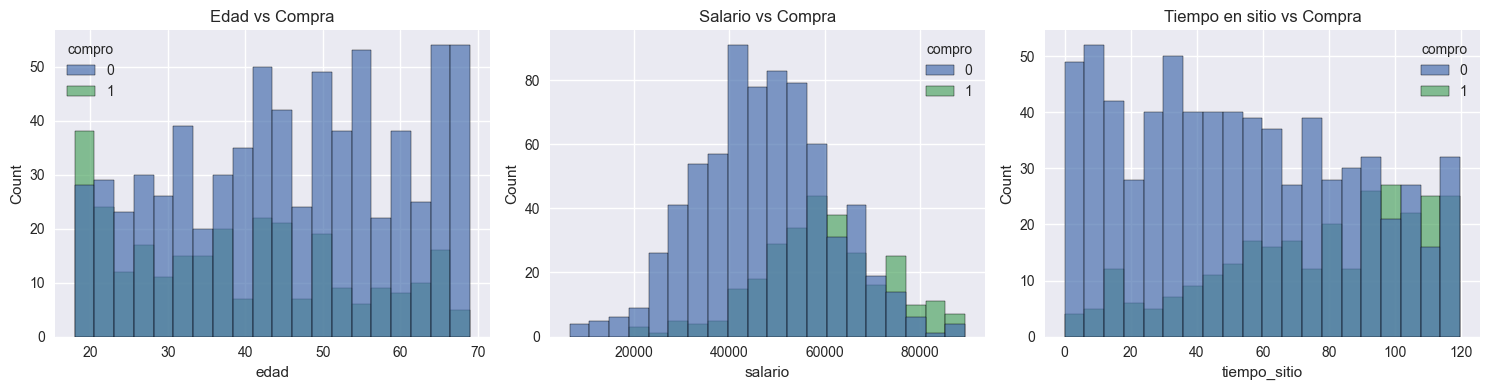

In [5]:
# CELDA 3: Exploración rápida
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.histplot(data=data, x='edad', hue='compro', ax=axes[0], bins=20, alpha=0.7)
sns.histplot(data=data, x='salario', hue='compro', ax=axes[1], bins=20, alpha=0.7)
sns.histplot(data=data, x='tiempo_sitio', hue='compro', ax=axes[2], bins=20, alpha=0.7)
axes[0].set_title("Edad vs Compra")
axes[1].set_title("Salario vs Compra")
axes[2].set_title("Tiempo en sitio vs Compra")
plt.tight_layout()
plt.show()

In [6]:
# CELDA 4: Preparar datos
X = data[['edad', 'salario', 'tiempo_sitio']]
y = data['compro']

# Estandarizar (importante para regresión logística)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
# CELDA 5: Entrenar el modelo
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

print("Modelo entrenado.")
print("Coeficientes:")
for var, coef in zip(['edad', 'salario', 'tiempo_sitio'], modelo.coef_[0]):
    print(f"  {var}: {coef:.4f}")
print(f"Intercepto: {modelo.intercept_[0]:.4f}")

Modelo entrenado.
Coeficientes:
  edad: -0.7398
  salario: 1.2534
  tiempo_sitio: 0.9920
Intercepto: -1.3340


In [8]:
# CELDA 6: Predicciones
y_pred = modelo.predict(X_test)
y_prob = modelo.predict_proba(X_test)[:, 1]  # Probabilidad de clase 1

=== MATRIZ DE CONFUSIÓN ===


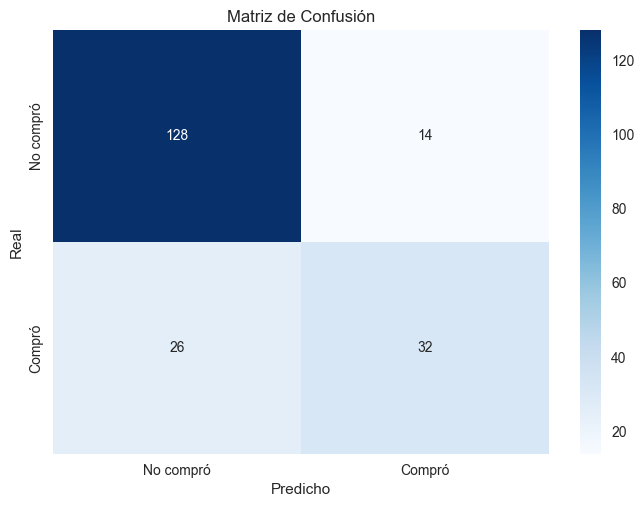


=== REPORTE DE CLASIFICACIÓN ===
              precision    recall  f1-score   support

   No compró       0.83      0.90      0.86       142
      Compró       0.70      0.55      0.62        58

    accuracy                           0.80       200
   macro avg       0.76      0.73      0.74       200
weighted avg       0.79      0.80      0.79       200


AUC-ROC: 0.846


In [9]:
# CELDA 7: Evaluación
print("=== MATRIZ DE CONFUSIÓN ===")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No compró', 'Compró'], yticklabels=['No compró', 'Compró'])
plt.ylabel('Real')
plt.xlabel('Predicho')
plt.title('Matriz de Confusión')
plt.show()

print("\n=== REPORTE DE CLASIFICACIÓN ===")
print(classification_report(y_test, y_pred, target_names=['No compró', 'Compró']))

print(f"\nAUC-ROC: {roc_auc_score(y_test, y_prob):.3f}")

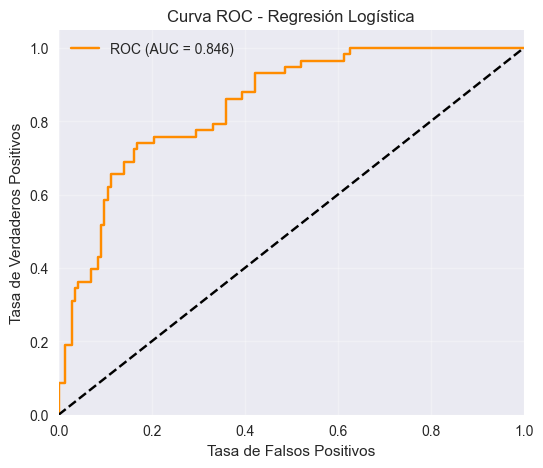

In [10]:
# CELDA 8: Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC (AUC = {roc_auc_score(y_test, y_prob):.3f})', color='darkorange')
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Regresión Logística')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [11]:
# CELDA 9: Predecir un nuevo cliente
nuevo_cliente = pd.DataFrame({
    'edad': [35],
    'salario': [60000],
    'tiempo_sitio': [45]
})

nuevo_scaled = scaler.transform(nuevo_cliente)
prob_compra = modelo.predict_proba(nuevo_scaled)[0, 1]
prediccion = modelo.predict(nuevo_scaled)[0]

print(f"\nNuevo cliente (35 años, $60k, 45 min en sitio):")
print(f"→ Probabilidad de compra: {prob_compra:.1%}")
print(f"→ Predicción: {'SÍ comprará' if prediccion == 1 else 'NO comprará'}")


Nuevo cliente (35 años, $60k, 45 min en sitio):
→ Probabilidad de compra: 36.8%
→ Predicción: NO comprará


![](img/ejemplo_regresion_lineal.png)